In [1]:
from utils.create_features_utils import *
import pandas as pd
import numpy as np
from keras import models, layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras import metrics
from keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('data/aus_open_matches_with_features.csv')

df = df.dropna()

df['diff_rank'] = df['player_0_rank'] - df['player_1_rank']

In [3]:
features_list = [
 'diff_rank',
 'diff_match_win_percent',
 'diff_games_win_percent',
 'diff_5_set_match_win_percent',
 'diff_close_sets_percent',
 'diff_match_win_percent_hard',
 'diff_games_win_percent_hard',
 'diff_5_set_match_win_percent_hard',
 'diff_close_sets_percent_hard',
 'diff_match_win_percent_60',
 'diff_games_win_percent_60',
 'diff_5_set_match_win_percent_60',
 'diff_close_sets_percent_60',
 'diff_match_win_percent_hard_100',
 'diff_games_win_percent_hard_100',
 'diff_5_set_match_win_percent_hard_100',
 'diff_close_sets_percent_hard_100',
 'diff_match_win_percent_hh',
 'diff_games_win_percent_hh',
 'diff_match_win_percent_hard_hh',
 'diff_games_win_percent_hard_hh']

In [4]:
target = df.outcome
features = df[features_list]

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.20, random_state=1)

In [6]:
# Build the Neural Network

network = models.Sequential()
network.add(layers.Dense(units=64, activation='relu', input_shape=(len(features.columns),)))
network.add(layers.Dense(units=32, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))

network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=500)
mc = ModelCheckpoint('data/best_model.h5', monitor='val_loss', mode='min', verbose=2, save_best_only=True)

history = network.fit(train_features, train_target, 
            epochs=1000, verbose=0, batch_size=128, 
            validation_data=(test_features, test_target), callbacks=[es, mc]) 

saved_model = load_model('data/best_model.h5')




Epoch 00001: val_loss improved from inf to 0.80425, saving model to data\best_model.h5

Epoch 00002: val_loss improved from 0.80425 to 0.72055, saving model to data\best_model.h5

Epoch 00003: val_loss did not improve from 0.72055

Epoch 00004: val_loss improved from 0.72055 to 0.60278, saving model to data\best_model.h5

Epoch 00005: val_loss improved from 0.60278 to 0.53301, saving model to data\best_model.h5

Epoch 00006: val_loss improved from 0.53301 to 0.52886, saving model to data\best_model.h5

Epoch 00007: val_loss improved from 0.52886 to 0.51354, saving model to data\best_model.h5

Epoch 00008: val_loss did not improve from 0.51354

Epoch 00009: val_loss improved from 0.51354 to 0.49767, saving model to data\best_model.h5

Epoch 00010: val_loss improved from 0.49767 to 0.49765, saving model to data\best_model.h5

Epoch 00011: val_loss improved from 0.49765 to 0.48956, saving model to data\best_model.h5

Epoch 00012: val_loss did not improve from 0.48956

Epoch 00013: val_lo

In [7]:
# Accuracy of the best model
_, train_acc = saved_model.evaluate(train_features, train_target, verbose=0)
_, test_acc = saved_model.evaluate(test_features, test_target, verbose=0)

print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))



Train Accuracy: 0.754, Test Accuracy: 0.807


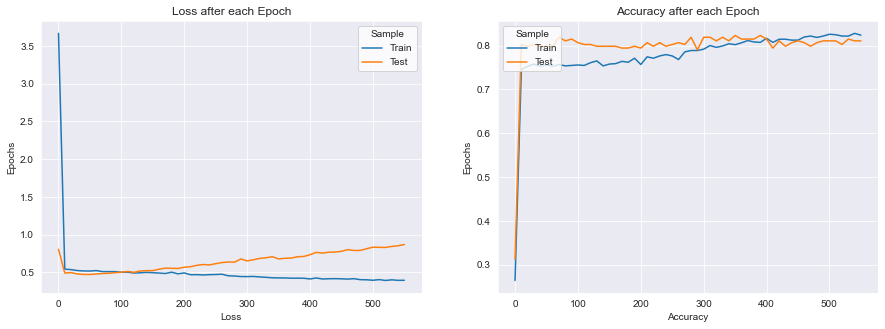

In [16]:
# Graph train/test loss and accuracy
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Loss after each Epoch')
plt.plot(history.epoch[::10], history.history['loss'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_loss'][::10], label='Test')
plt.legend(['Train', 'Test'],loc='upper right', title='Sample', facecolor='white',fancybox=True)
plt.xlabel('Loss')
plt.ylabel('Epochs')

plt.subplot(1, 2, 2)
plt.title('Accuracy after each Epoch')
plt.plot(history.epoch[::10], history.history['accuracy'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_accuracy'][::10], label='Test')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left', title='Sample', facecolor='white', fancybox=True)


plt.savefig('data/loss_acc.jpg', quality=100)

In [17]:
# Test data classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_target, saved_model.predict_classes(test_features)))
print(confusion_matrix(test_target, saved_model.predict_classes(test_features)))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       190
           1       0.88      0.13      0.23        53

    accuracy                           0.81       243
   macro avg       0.84      0.56      0.56       243
weighted avg       0.82      0.81      0.75       243

[[189   1]
 [ 46   7]]


C:\Users\justi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\justi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

In [18]:
# Trained data classification report and confusion matrix
print(classification_report(train_target, saved_model.predict_classes(train_features)))
print(confusion_matrix(train_target, saved_model.predict_classes(train_features)))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86       722
           1       0.61      0.10      0.17       248

    accuracy                           0.75       970
   macro avg       0.68      0.54      0.51       970
weighted avg       0.72      0.75      0.68       970

[[706  16]
 [223  25]]


C:\Users\justi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\justi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if